In [6]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

from tpot import TPOTClassifier

import keras
import tensorflow as tf

In [7]:
# Reading the dataset
df = pd.read_csv('../data/deep_learning_task_dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5000 non-null   object 
 1   Item_Weight                4182 non-null   float64
 2   Item_Fat_Content           5000 non-null   object 
 3   Item_Visibility            5000 non-null   float64
 4   Item_Type                  5000 non-null   object 
 5   Item_MRP                   5000 non-null   float64
 6   Outlet_Identifier          5000 non-null   object 
 7   Outlet_Establishment_Year  5000 non-null   int64  
 8   Outlet_Size                3561 non-null   object 
 9   Outlet_Location_Type       5000 non-null   object 
 10  Outlet_Type                5000 non-null   object 
 11  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 468.9+ KB


In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_28464/889244835.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [11]:
df['Outlet_Size'].value_counts()

Medium    3044
Small     1398
High       558
Name: Outlet_Size, dtype: int64

In [12]:
print(df['Item_Fat_Content'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Identifier'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
# Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])


In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [16]:
df = df.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,3,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1,0,2,1,994.7052


In [17]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']


In [18]:
X.shape, y.shape

((5000, 9), (5000,))

In [19]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4000, 9), (4000,)), ((1000, 9), (1000,)))

In [69]:
# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense, Dropout

In [21]:
# number of input neurons
X_train.shape

(4000, 9)

In [22]:
# number of features in the data
X_train.shape[1]

9

In [23]:
# defining input neurons
input_neurons = X_train.shape[1]
input_neurons

9

In [24]:
# define number of output neurons
output_neurons = 1

In [85]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 20
neuron_hidden_layer_2 = 10


In [86]:
# defining the architecture of the model
# Define the model
model = Sequential()

model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
# model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 20)                200       
                                                                 
 dense_20 (Dense)            (None, 10)                210       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 421 (1.64 KB)
Trainable params: 421 (1.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400)

Epoch 1/400
125/125 [==============================] - 1s 2ms/step - loss: 7507944.5000 - mae: 2152.6079 - val_loss: 7390119.5000 - val_mae: 2129.3633
Epoch 2/400
125/125 [==============================] - 0s 1ms/step - loss: 6429356.5000 - mae: 1937.6523 - val_loss: 5411020.5000 - val_mae: 1737.8484
Epoch 3/400
125/125 [==============================] - 0s 2ms/step - loss: 3800907.7500 - mae: 1403.7450 - val_loss: 2588318.2500 - val_mae: 1169.7527
Epoch 4/400
125/125 [==============================] - 0s 1ms/step - loss: 2118734.0000 - mae: 1054.8809 - val_loss: 1997210.3750 - val_mae: 1052.9968
Epoch 5/400
125/125 [==============================] - 0s 1ms/step - loss: 1941424.6250 - mae: 1037.1759 - val_loss: 1984700.3750 - val_mae: 1053.6396
Epoch 6/400
125/125 [==============================] - 0s 1ms/step - loss: 1934871.3750 - mae: 1035.7435 - val_loss: 1980872.7500 - val_mae: 1054.7767
Epoch 7/400
125/125 [==============================] - 0s 2ms/step - loss: 1931086.5000 - mae:

In [88]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 987us/step - loss: 1287361.8750 - mae: 795.6178


In [89]:
from sklearn.metrics import r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


32/32 [==============================] - 0s 805us/step
R2 Score: 0.5596254492380754


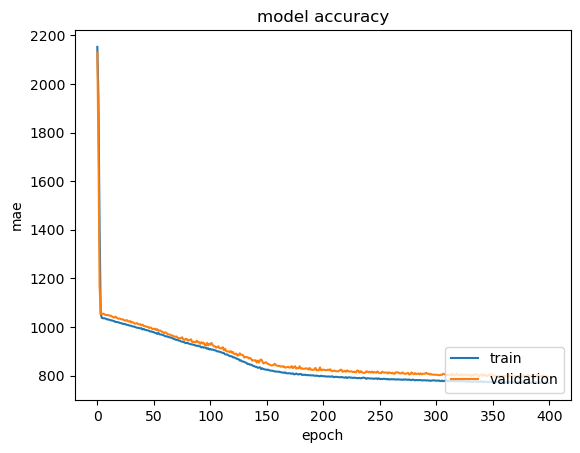

In [90]:
# summarize history for loss
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()